In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

In [64]:
# Take Input Data from File
t_data = pd.read_csv("Titanic.csv")
t_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
print("Number of passenger:"+str(len(t_data["PassengerId"])))

Number of passenger:891


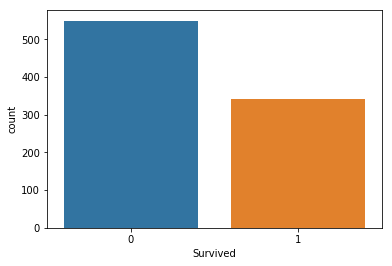

In [66]:
#Ploting Data
sns.countplot(x="Survived",data=t_data)

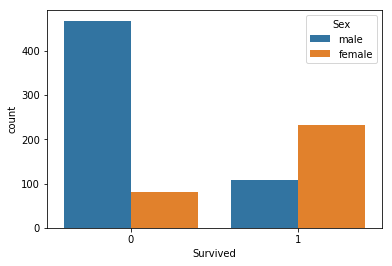

In [67]:
sns.countplot(x="Survived",data=t_data,hue="Sex")

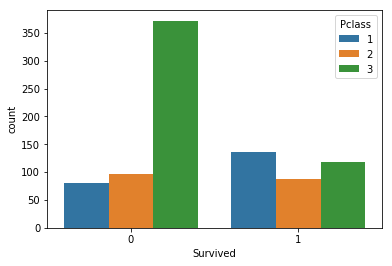

In [68]:
sns.countplot(x="Survived",data=t_data,hue="Pclass")

ValueError: range parameter must be finite.

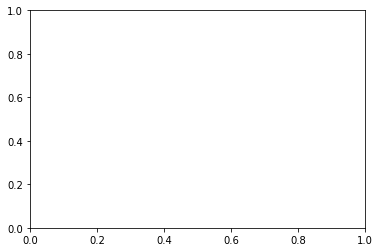

In [69]:
bins=np.arange(0,101,10)

plt.hist(t_data['Age'],bins,histtype='bar',rwidth=0.8,label='Count')
plt.xlabel('Ages')
plt.ylabel('Number of Persons')

ValueError: range parameter must be finite.

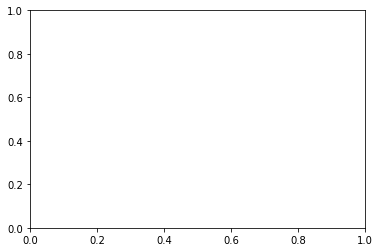

In [70]:
bins=np.array([0,10,20,30,40,50,60,70,80,90,100])

plt.hist(t_data["Age"],bins,histtype='bar',rwidth=0.8,label='Count')
plt.xlabel('Ages')
plt.ylabel('Number of Persons')

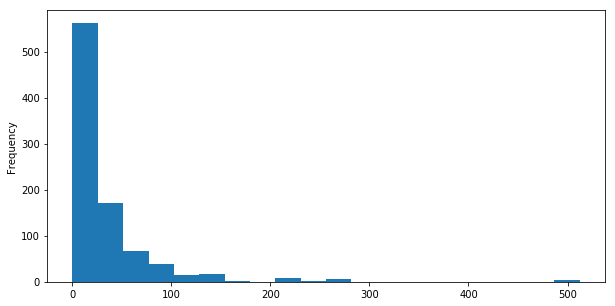

In [71]:
t_data["Fare"].plot.hist(bins=20,figsize=(10,5))

In [72]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


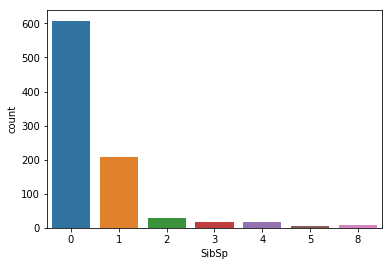

In [73]:
sns.countplot(x="SibSp",data=t_data)

# Data Cleaning and Wrangling

In [74]:
t_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [75]:
t_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

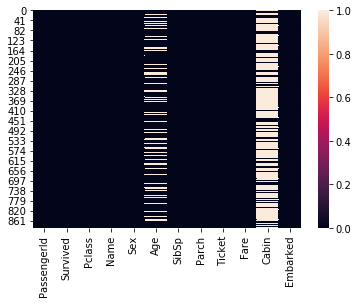

In [76]:
sns.heatmap(t_data.isnull())

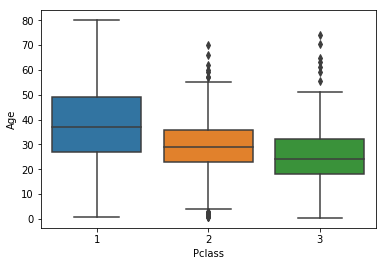

In [77]:
sns.boxplot(x="Pclass",y="Age",data=t_data)

In [78]:
# Class 1= 30-50
# Class 2= 25-35
# Class 3= 19-32

In [79]:
t_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
t_data.drop("Cabin",axis=1,inplace=True)

In [81]:
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [82]:
t_data.dropna(inplace=True)

In [83]:
t_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [84]:
print("Number of passengers:"+str(len(t_data["PassengerId"])))

Number of passengers:712


In [85]:
# Now data is clean no NAN value

In [86]:
sex=pd.get_dummies(t_data["Sex"])
print(sex.head(5))

   female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1


In [87]:
sex=pd.get_dummies(t_data["Sex"],drop_first=True)
print(sex.head(5))

   male
0     1
1     0
2     0
3     0
4     1


In [88]:
embarked=pd.get_dummies(t_data["Embarked"])
print(sex.head(5))

   male
0     1
1     0
2     0
3     0
4     1


In [89]:
embarked=pd.get_dummies(t_data["Embarked"],drop_first=True)
print(sex.head(5))

   male
0     1
1     0
2     0
3     0
4     1


In [90]:
pclass=pd.get_dummies(t_data["Pclass"])
print(pclass.head(5))

   1  2  3
0  0  0  1
1  1  0  0
2  0  0  1
3  1  0  0
4  0  0  1


In [91]:
pclass=pd.get_dummies(t_data["Pclass"],drop_first=True)
print(pclass.head(5))

   2  3
0  0  1
1  0  0
2  0  1
3  0  0
4  0  1


In [92]:
t_data=pd.concat([t_data,sex,embarked,pclass],axis=1)

In [93]:
t_data.head(5) # here 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [94]:
t_data.drop(['Sex','Embarked','PassengerId','Name','Ticket','Pclass'],axis=1,inplace=True)

In [95]:
t_data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [96]:
t_data.drop(['Q','S'],axis=1,inplace=True)

In [97]:
t_data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


In [98]:
t_data=pd.concat([t_data,sex,embarked],axis=1)

In [99]:
t_data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,2,3,male,Q,S
0,0,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,1,0,1


# Train Model

In [59]:
x=t_data.drop("Survived",axis=1)
y=t_data["Survived"]

In [102]:
from sklearn.model_selection import train_test_split

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
LRmodel=LogisticRegression()

In [126]:
LRmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [127]:
predictions=LRmodel.predict(x_test)

In [128]:
print(predictions)

[1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0
 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0]


In [129]:
print(y_test.values)

[1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0
 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1
 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0
 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [130]:
from sklearn.metrics import classification_report

In [131]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.68      0.84      0.75       126
          1       0.66      0.44      0.53        88

avg / total       0.67      0.68      0.66       214



In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
confusion_matrix(y_test,predictions)

array([[106,  20],
       [ 49,  39]], dtype=int64)

In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.67757009345794394

# Example 2: SUV Prediction

In [135]:
import numpy as np
import matplotlib as plt
import pandas as pd
%matplotlib inline

In [136]:
dataset=pd.read_csv("SUV_data.csv")

In [137]:
dataset.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [138]:
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [139]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [140]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1,

In [141]:
from sklearn.model_selection import train_test_split

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
classifier=LogisticRegression(random_state=0)

In [148]:
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [149]:
y_pred=classifier.predict(x_test)

In [150]:
from sklearn.metrics import accuracy_score

In [152]:
accuracy_score(y_test,y_pred)*100

88.0